# 📊 Anomaly Detection & Time Series — Assignment Solutions (Concise Version)
**Assignment Code:** DA-AG-018

This notebook provides short theoretical answers and minimal Python code for each question.


## 🧠 Part A — Theory Questions

### **Q1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies).**
Anomaly detection identifies data points that deviate significantly from normal patterns.
- **Point anomaly:** A single data point far from the rest (e.g., one abnormally high transaction).
- **Contextual anomaly:** Abnormal in a specific context (e.g., high temperature in winter).
- **Collective anomaly:** A group behaving abnormally (e.g., a sudden spike in network traffic).

---

### **Q2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor.**
| Algorithm | Approach | Use Case |
|------------|-----------|-----------|
| Isolation Forest | Randomly isolates data points to find anomalies | Large high-dimensional datasets |
| DBSCAN | Density-based clustering detects outliers as low-density points | Spatial data or clusters of irregular shape |
| LOF | Measures local density deviation of a data point vs neighbors | Local density-based anomaly detection |

---

### **Q3. What are the key components of a Time Series?**
1. **Trend:** Long-term direction (↑ or ↓).  
2. **Seasonality:** Repeating patterns (e.g., sales peaks every December).  
3. **Cyclic:** Irregular rises/falls not fixed in period.  
4. **Noise:** Random variations.

---

### **Q4. Define Stationarity and how to achieve it.**
A time series is **stationary** if mean, variance, and autocovariance are constant over time.  
- **Test:** Augmented Dickey–Fuller (ADF) test.  
- **Make stationary:** Differencing, log transform, or detrending.

---

### **Q5. Differentiate AR, MA, ARIMA, SARIMA, and SARIMAX.**
| Model | Components | Description |
|--------|-------------|-------------|
| AR | p | Depends on past values |
| MA | q | Depends on past forecast errors |
| ARIMA | p, d, q | Combines AR & MA with differencing |
| SARIMA | p, d, q + seasonal(P,D,Q,s) | Adds seasonality |
| SARIMAX | SARIMA + exogenous vars | Includes external features |

---


## 💻 Part B — Practical & Applied Questions
Concise Python examples for each practical question.


### **Q6. Decompose the AirPassengers dataset into trend, seasonality, and residual components.**

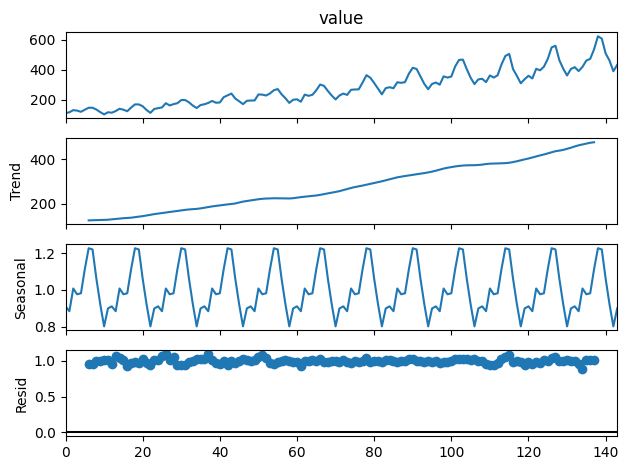

In [1]:

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Load sample AirPassengers dataset
data = get_rdataset("AirPassengers").data
series = data["value"]
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
plt.show()


### **Q7. Apply Isolation Forest on numerical data (e.g., NYC Taxi Fare) to detect anomalies.**

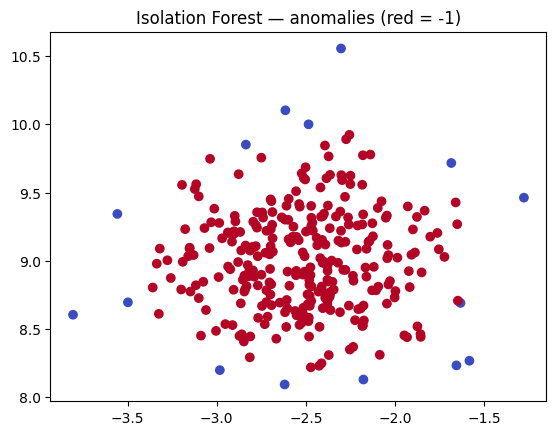

In [2]:

from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.4, random_state=42)
iso = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm')
plt.title("Isolation Forest — anomalies (red = -1)")
plt.show()


### **Q8. Train a SARIMA model on AirPassengers and forecast next 12 months.**

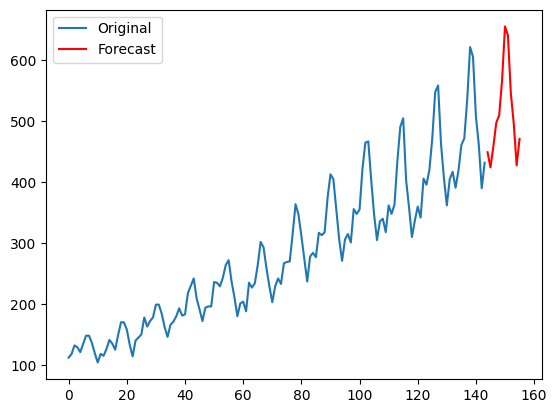

In [3]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12))
fit = model.fit(disp=False)
forecast = fit.forecast(12)
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(); plt.show()


### **Q9. Apply Local Outlier Factor (LOF) to detect anomalies.**

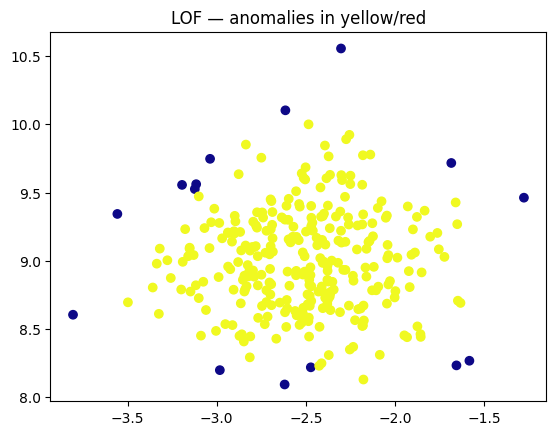

In [4]:

from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='plasma')
plt.title("LOF — anomalies in yellow/red")
plt.show()



### **Q10. Real-time energy demand forecasting and anomaly detection workflow.**
**Workflow:**
1. **Streaming ingestion:** Collect 15-min data (Kafka, Spark Streaming).
2. **Anomaly detection:** Use Isolation Forest or LOF in sliding windows.
3. **Forecasting model:** SARIMAX (includes weather/region as exogenous variables).
4. **Validation:** Rolling RMSE/MAE, monitor drift.
5. **Business use:** Detect grid stress early, optimize load, prevent outages.

**Pseudocode:**
```python
model = SARIMAX(train, exog=weather, order=(1,1,1), seasonal_order=(1,1,1,96))
model_fit = model.fit()
forecast = model_fit.forecast(steps=96, exog=new_weather)
anomalies = IsolationForest().fit_predict(latest_data)
```
